hw_1.

Задание 1. Выберите наборы данных, которые можно интерпретировать, как временные ряды:
(на всё можно ответить да, если взглянуть под нужным углом)

а) зависимость цены на недвижимость в конкретном регионе от времени,  (да)

б) скорость полета самолета при перелете из аэропорта А в аэропорт В, (да, если речь идет о мгновенных скоростях на разные моменты)

в) количество отказов компьютера, (да, если речь про один и тот же комп и в динамике, нет - если без привязки к конкретным временам)

г) число обращений в поликлинику по району, (да, если упорядочено по датам)

д) координаты автобуса при движении по маршруту, (да, упорядочено по времени и прямая зависимость последующих от предыдущих)

е) координаты фигуры нарушителя в файле видеофиксации охранной системы (да, если может быть упорядочено по времени, а не "внавал").

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error


Задание 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('DUQ_hourly.csv', parse_dates=[0])
print(data.columns)
data.head(4)

Index(['Datetime', 'DUQ_MW'], dtype='object')


,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119068 entries, 0 to 119067
Data columns (total 2 columns):
Datetime    119068 non-null datetime64[ns]
DUQ_MW      119068 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 MB


Данные содержат 119068 записей в двух колонках: дата+время ('Datetime') и величина средней потреблённой мощности в текущий час ('DUQ_MW') в мегаваттах, все записи ненулевые

In [4]:
ts = data.Datetime
ts.value_counts()[0:10]
# проверка на дублирование индекса показала наличие 4х одинаковых индексов 
# на первой неделе ноября в 14,15,16 и 17 годах в 2 часа ночи

#" В соответствии с решением Конгресса 2007 года переход на зимнее время осуществляется
# в первое воскресенье ноября, а на летнее — во второе воскресенье марта. "

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
2012-02-07 10:00:00    1
2016-09-01 10:00:00    1
2006-05-15 11:00:00    1
2010-12-08 11:00:00    1
2015-07-03 11:00:00    1
Name: Datetime, dtype: int64

In [5]:
print(ts[20:26])
ts.diff()[20:26]
# выявлены немонотонности следования времени

20   2005-12-31 21:00:00
21   2005-12-31 22:00:00
22   2005-12-31 23:00:00
23   2006-01-01 00:00:00
24   2005-12-30 01:00:00
25   2005-12-30 02:00:00
Name: Datetime, dtype: datetime64[ns]


20     0 days 01:00:00
21     0 days 01:00:00
22     0 days 01:00:00
23     0 days 01:00:00
24   -2 days +01:00:00
25     0 days 01:00:00
Name: Datetime, dtype: timedelta64[ns]

In [38]:
ts_sort = ts.sort_values()
print(ts_sort[ts_sort.diff() != '1h'])
print(ts_sort.diff()[ts_sort.diff() != '1h'])
# помимо дублирования найдены и пропуски во времени фиксации, чаще всего они относились 
# к моментам перевода часов на сезонное время: в марте (апреле в 2005г) и ноябре
# Исправлять дублирование будем вдальнейшем - оставлением одной записи со средним для них значением
#            пропуски - вставлением записи для этого времени со значением, интерполированным от соседей

8734     2005-01-01 01:00:00
6529     2005-04-03 04:00:00
1489     2005-10-30 03:00:00
15311    2006-04-02 04:00:00
10271    2006-10-29 03:00:00
24597    2007-03-11 04:00:00
18885    2007-11-04 03:00:00
33403    2008-03-09 04:00:00
27691    2008-11-02 03:00:00
42209    2009-03-08 04:00:00
36497    2009-11-01 03:00:00
50822    2010-03-14 04:00:00
45110    2010-11-07 03:00:00
44318    2010-12-10 01:00:00
59604    2011-03-13 04:00:00
53892    2011-11-06 03:00:00
68410    2012-03-11 04:00:00
62698    2012-11-04 03:00:00
77216    2013-03-10 04:00:00
71504    2013-11-03 03:00:00
86000    2014-03-09 04:00:00
80287    2014-11-02 02:00:00
94784    2015-03-08 04:00:00
89071    2015-11-01 02:00:00
103424   2016-03-13 04:00:00
97711    2016-11-06 02:00:00
112232   2017-03-12 04:00:00
106519   2017-11-05 02:00:00
117391   2018-03-11 04:00:00
Name: Datetime, dtype: datetime64[ns]
8734          NaT
6529     02:00:00
1489     02:00:00
15311    02:00:00
10271    02:00:00
24597    02:00:00
18885    02:0

In [66]:
dfs = data.sort_values(by=['Datetime'])
dfs.head()

,Datetime,DUQ_MW
8734,2005-01-01 01:00:00,1364.0
8735,2005-01-01 02:00:00,1273.0
8736,2005-01-01 03:00:00,1218.0
8737,2005-01-01 04:00:00,1170.0
8738,2005-01-01 05:00:00,1166.0


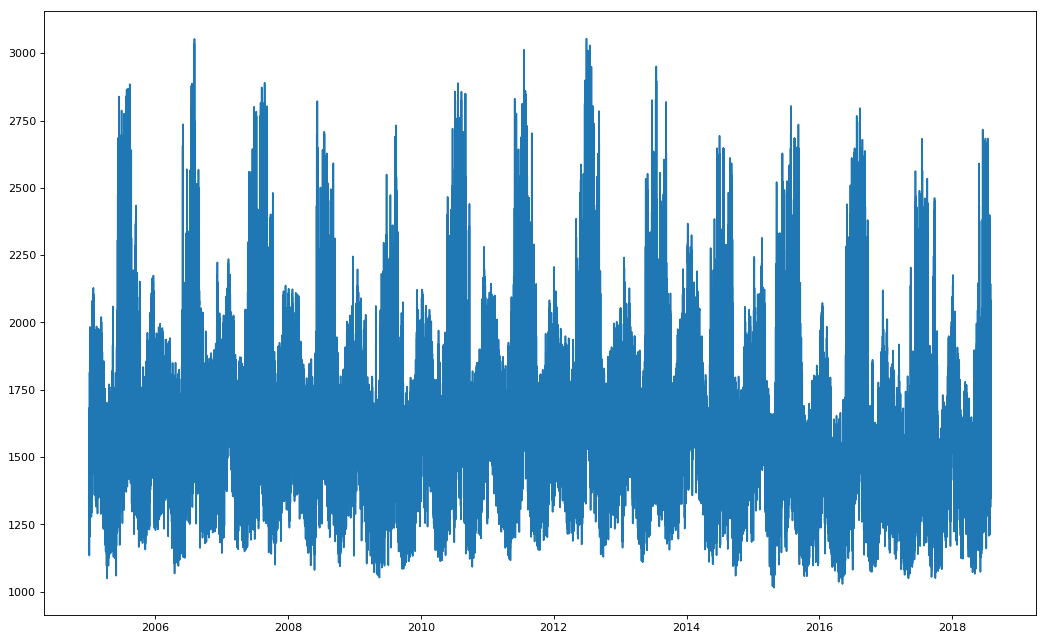

In [13]:
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(dfs['Datetime'],dfs['DUQ_MW'])
# Особенностью датасета (в самом большом масштабе) является чёткая сезонность колебаний: 
#   небольшой максимум в зимнее время(отопление) и больший максимум в летнее время (кондиционеры)
#   минимумы - в межсезонье
#

(731947.0, 732311.0)

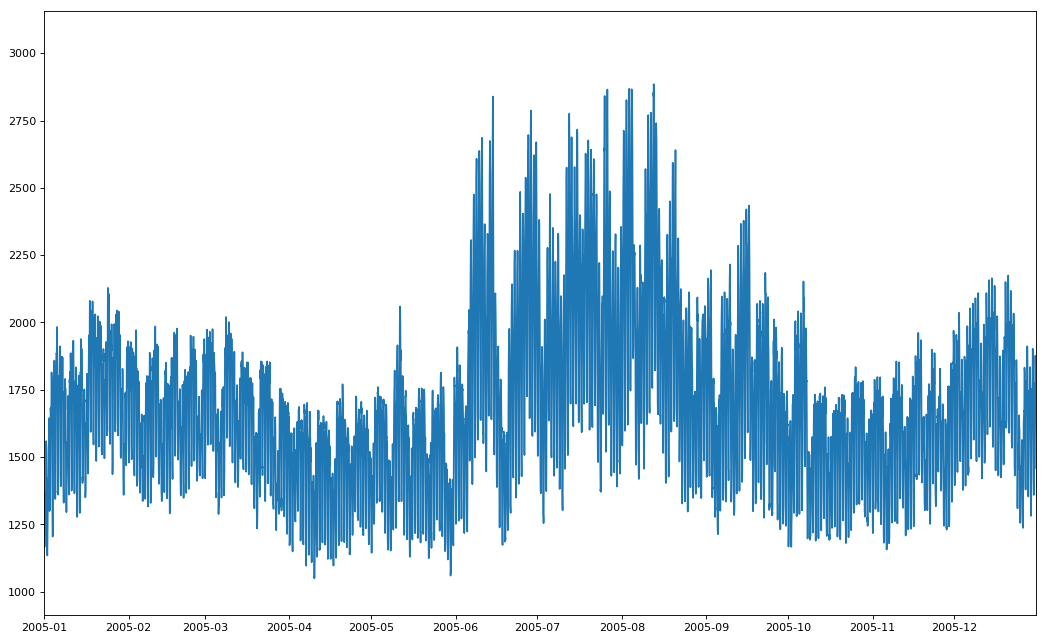

In [20]:
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(dfs['Datetime'],dfs['DUQ_MW'])
plt.xlim('2005-01-01','2005-12-31')
# На масштабе одного года помимо сезонных заметны и недельные циклы
#

(731992.0, 732020.0)

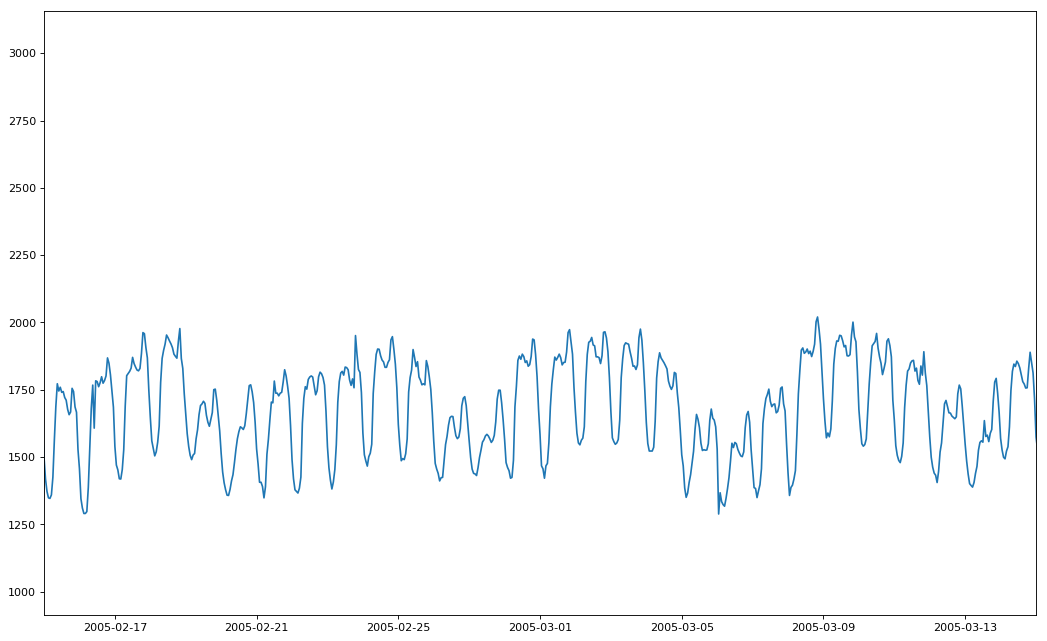

In [21]:
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(dfs['Datetime'],dfs['DUQ_MW'])
plt.xlim('2005-02-15','2005-03-15')
# На масштабе одного месяца видны недельные и дневные циклы


*Задание 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям, по месяцам.

In [48]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

In [53]:
brent_data  = brent_data.sort_index()
brent_data2 = brent_data.copy()
brent_data2['Значение'] = brent_data['Значение']*brent_data['Значение']
brent_data2  = brent_data2.sort_index()
brent_data.head(5)

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


In [58]:
brent_week_data  = brent_data.resample("W").mean()
brent_week_data2 = brent_data2.resample("W").mean()

brent_week_var   = np.sqrt(brent_week_data2 - brent_week_data*brent_week_data)
brent_week_var.head(5)

,Значение
Дата,
2010-09-05,0.166084
2010-09-12,0.593146
2010-09-19,0.492702
2010-09-26,0.544133
2010-10-03,2.198730


In [59]:
brent_month_data  = brent_data.resample("M").mean()
brent_month_data2 = brent_data2.resample("M").mean()
brent_month_var   = np.sqrt(brent_month_data2 - brent_month_data*brent_month_data)

brent_month_var.head(5)

,Значение
Дата,
2010-09-30,1.270074
2010-10-31,0.881109
2010-11-30,1.719571
2010-12-31,1.415283
2011-01-31,1.804928


In [60]:
brent_year_data  = brent_data.resample("Y").mean()
brent_year_data2 = brent_data2.resample("Y").mean()
brent_year_var   = np.sqrt(brent_year_data2 - brent_year_data*brent_year_data)

brent_year_var.head(5)

,Значение
Дата,
2010-12-31,5.243914
2011-12-31,7.009204
2012-12-31,7.765147
2013-12-31,4.008094
2014-12-31,14.489034


4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

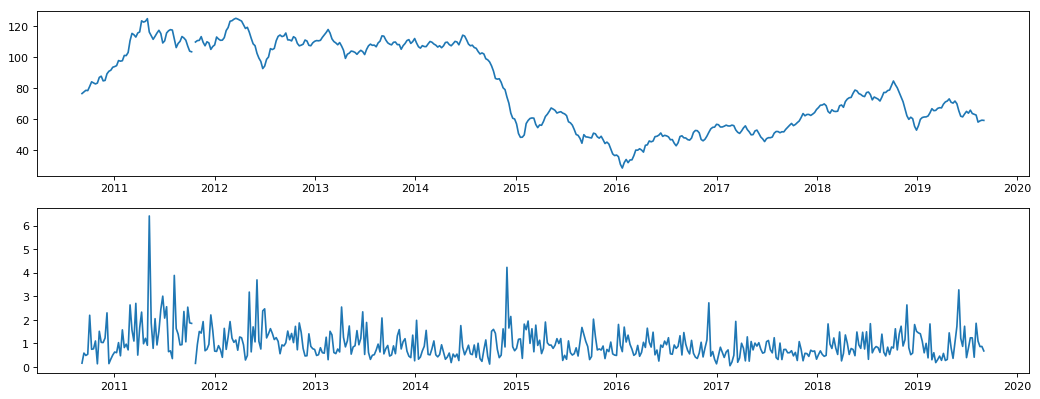

In [63]:
fig = plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(2,1,1)
plt.plot(brent_week_data.index,brent_week_data.values)
ax2 = fig.add_subplot(2,1,2)
plt.plot(brent_week_var.index,brent_week_var.values)

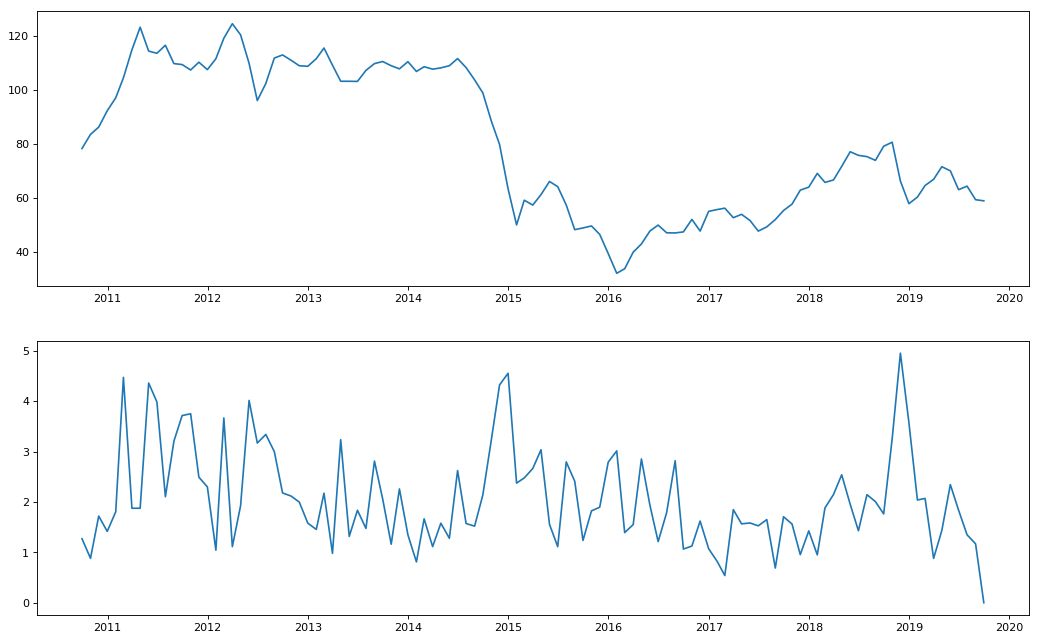

In [64]:
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(2,1,1)
plt.plot(brent_month_data.index,brent_month_data.values)
ax2 = fig.add_subplot(2,1,2)
plt.plot(brent_month_var.index,brent_month_var.values)

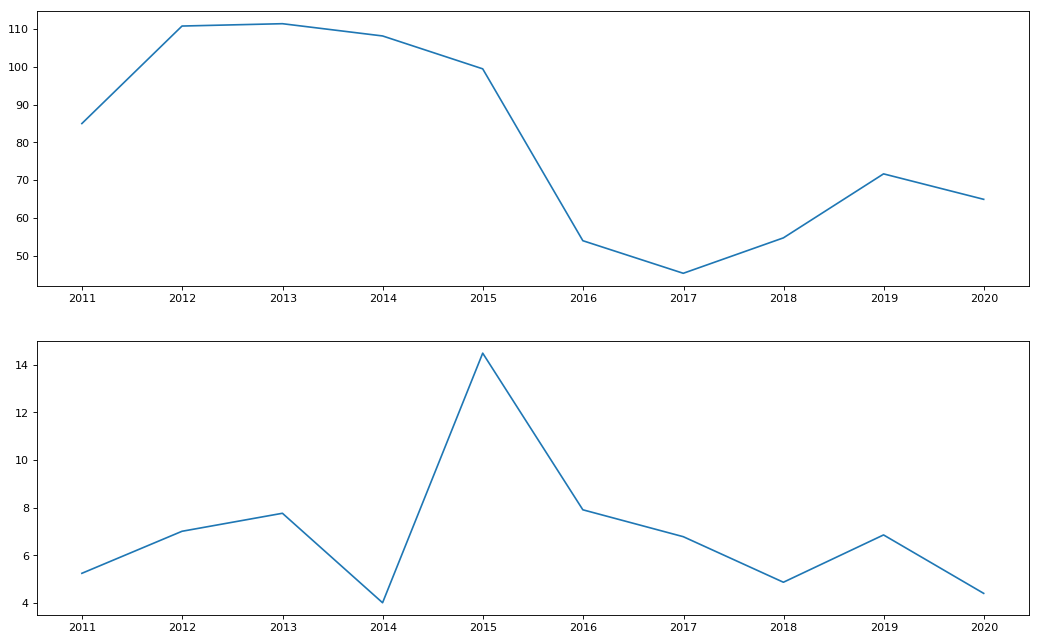

In [65]:
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(2,1,1)
plt.plot(brent_year_data.index,brent_year_data.values)
ax2 = fig.add_subplot(2,1,2)
plt.plot(brent_year_var.index,brent_year_var.values)

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

In [ ]:
# динамика цены есть своя - особая на разных масштабах, но с сезонностью практически не связана
# 